# Pose Detection with AlphaPhose v0.3.0

This notebook uses an open source project [MVIG-SJTU/AlphaPose](https://github.com/MVIG-SJTU/AlphaPose) to detect/track multi person poses on a given youtube video.

For other deep-learning Colab notebooks, visit [tugstugi/dl-colab-notebooks](https://github.com/tugstugi/dl-colab-notebooks).


## Install AlphaPose v0.3.0

In [0]:
import os
from os.path import exists, join, basename, splitext

git_repo_url = 'https://github.com/MVIG-SJTU/AlphaPose.git'
project_name = splitext(basename(git_repo_url))[0]
if not exists(project_name):
  # clone and install dependencies
  !git clone -q {git_repo_url}
  !pip install -q youtube-dl cython gdown
  !pip install -q -U PyYAML
  !apt-get install -y -q libyaml-dev
  !cd {project_name} && git checkout 7be9809 && python setup.py build develop --user
  
import sys
sys.path.append(project_name)
import time
import matplotlib
import matplotlib.pylab as plt
plt.rcParams["axes.grid"] = False

from IPython.display import YouTubeVideo

     |████████████████████████████████| 1.8MB 8.1MB/s 
     |████████████████████████████████| 276kB 8.9MB/s 
Reading package lists...
Building dependency tree...
Reading state information...
Suggested packages:
  libyaml-doc
The following NEW packages will be installed:
  libyaml-dev
0 upgraded, 1 newly installed, 0 to remove and 25 not upgraded.
Need to get 55.7 kB of archives.
After this operation, 246 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 libyaml-dev amd64 0.1.7-2ubuntu3 [55.7 kB]
Fetched 55.7 kB in 0s (936 kB/s)
Selecting previously unselected package libyaml-dev:amd64.
(Reading database ... 145118 files and directories currently installed.)
Preparing to unpack .../libyaml-dev_0.1.7-2ubuntu3_amd64.deb ...
Unpacking libyaml-dev:amd64 (0.1.7-2ubuntu3) ...
Setting up libyaml-dev:amd64 (0.1.7-2ubuntu3) ...
Note: checking out '7be9809'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and comm

## Download pretrained models

In [0]:
yolo_pretrained_model_path = join(project_name, 'detector/yolo/data/yolov3-spp.weights')
if not exists(yolo_pretrained_model_path):
  # download the YOLO weights
  !mkdir -p {project_name}/detector/yolo/data
  !gdown -O {yolo_pretrained_model_path} https://drive.google.com/uc?id=1D47msNOOiJKvPOXlnpyzdKA3k6E97NTC

#tracker_pretrained_model_path = join(project_name, 'detector/tracker/data/jde.1088x608.uncertainty.pt')
#if not exists(tracker_pretrained_model_path):
#  # tracker weights
#  !mkdir -p {project_name}/detector/tracker/data
#  !gdown -O {tracker_pretrained_model_path} https://drive.google.com/uc?id=1nlnuYfGNuHWZztQHXwVZSL_FvfE551pA

# ResNet152 backbone 73.3 AP
pretrained_model_path = join(project_name, 'pretrained_models/fast_421_res152_256x192.pth')
pretrained_model_config_path = join(project_name, 'configs/coco/resnet/256x192_res152_lr1e-3_1x-duc.yaml')
if not exists(pretrained_model_path):
  # download the pretrained model
  !gdown -O {pretrained_model_path} https://drive.google.com/uc?id=1kfyedqyn8exjbbNmYq8XGd2EooQjPtF9

Downloading...
From: https://drive.google.com/uc?id=1D47msNOOiJKvPOXlnpyzdKA3k6E97NTC
To: /content/AlphaPose/detector/yolo/data/yolov3-spp.weights
252MB [00:03, 83.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1kfyedqyn8exjbbNmYq8XGd2EooQjPtF9
To: /content/AlphaPose/pretrained_models/fast_421_res152_256x192.pth
334MB [00:03, 88.4MB/s]


## Detect poses on a test video

We are going to detect poses on the following youtube video:

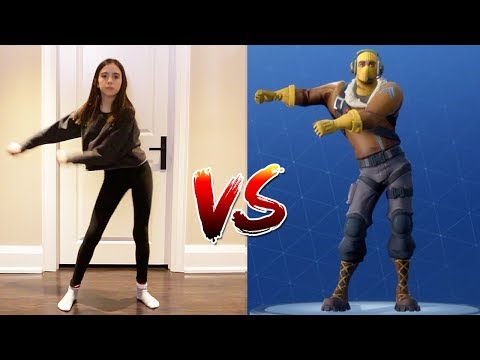

In [0]:
YOUTUBE_ID = 'RXABo9hm8B8'


YouTubeVideo(YOUTUBE_ID)

Download the above youtube video, cut the first 5 seconds and do the pose detection on that 5 seconds:

In [0]:
!rm -df youtube.mp4
# download the youtube with the given ID
!youtube-dl -f 'bestvideo[ext=mp4]' --output "youtube.%(ext)s" https://www.youtube.com/watch?v={YOUTUBE_ID}
# cut the first 5 seconds
!ffmpeg -y -loglevel info -i youtube.mp4 -t 5 video.avi
# run AlpaPose on these 5 seconds video
!rm -rf AlphaPose_video.avi
!cd {project_name} && python3 scripts/demo_inference.py --sp --video ../video.avi --outdir ../ --save_video --checkpoint ../{pretrained_model_path} --cfg ../{pretrained_model_config_path}
# convert the result into MP4
!ffmpeg -y -loglevel info -i AlphaPose_video.avi -vcodec libx264 AlphaPose_video.mp4

[youtube] RXABo9hm8B8: Downloading webpage
[download] Destination: youtube.mp4
[download] 100% of 137.09MiB in 00:02
ffmpeg version 3.4.6-0ubuntu0.18.04.1 Copyright (c) 2000-2019 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.3.0-16ubuntu3)
  configuration: --prefix=/usr --extra-version=0ubuntu0.18.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-li

Finally, visualize the result:

In [0]:
def show_local_mp4_video(file_name, width=640, height=480):
  import io
  import base64
  from IPython.display import HTML
  video_encoded = base64.b64encode(io.open(file_name, 'rb').read())
  return HTML(data='''<video width="{0}" height="{1}" alt="test" controls>
                        <source src="data:video/mp4;base64,{2}" type="video/mp4" />
                      </video>'''.format(width, height, video_encoded.decode('ascii')))

show_local_mp4_video('AlphaPose_video.mp4', width=960, height=720)